In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
import io
%cd "/Users/rajeshprabhakarkaila/Desktop/Datasets"

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [206]:
imdb=pd.read_excel("Imdb Movie reviews.xlsx")

In [207]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [208]:
imdb.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0


In [209]:
pd.set_option("display.max_colwidth",None)
imdb.Description.head(3)

0                                  A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
1                                  Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.
2    Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.
Name: Description, dtype: object

In [210]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [211]:
# Convert to lower case
imdb.Description=imdb.Description.str.lower()

In [212]:
from sklearn.feature_extraction.text import CountVectorizer

In [213]:
DTM=CountVectorizer(max_features=200,stop_words="english",ngram_range=(2,2))

In [214]:
X_DTM=DTM.fit_transform(imdb.Description)

In [215]:
pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_).head(2)

,save world,los angeles,title character,serial killer,new york,harry potter,african american,early years,york city,american history,...,friends embark,held hostage,man awakens,friends gather,thirty years,summer vacation,american family,sets motion,joins group,brutally murdered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.metrics import pairwise_distances

In [217]:
euclidean_distance=pairwise_distances(X_DTM,X_DTM)

In [218]:
linkage_matrix=linkage(euclidean_distance,method="ward")

/var/folders/_l/p3t8s2t90p719nx38hrx7_gr0000gn/T/ipykernel_6077/201131668.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix=linkage(euclidean_distance,method="ward")


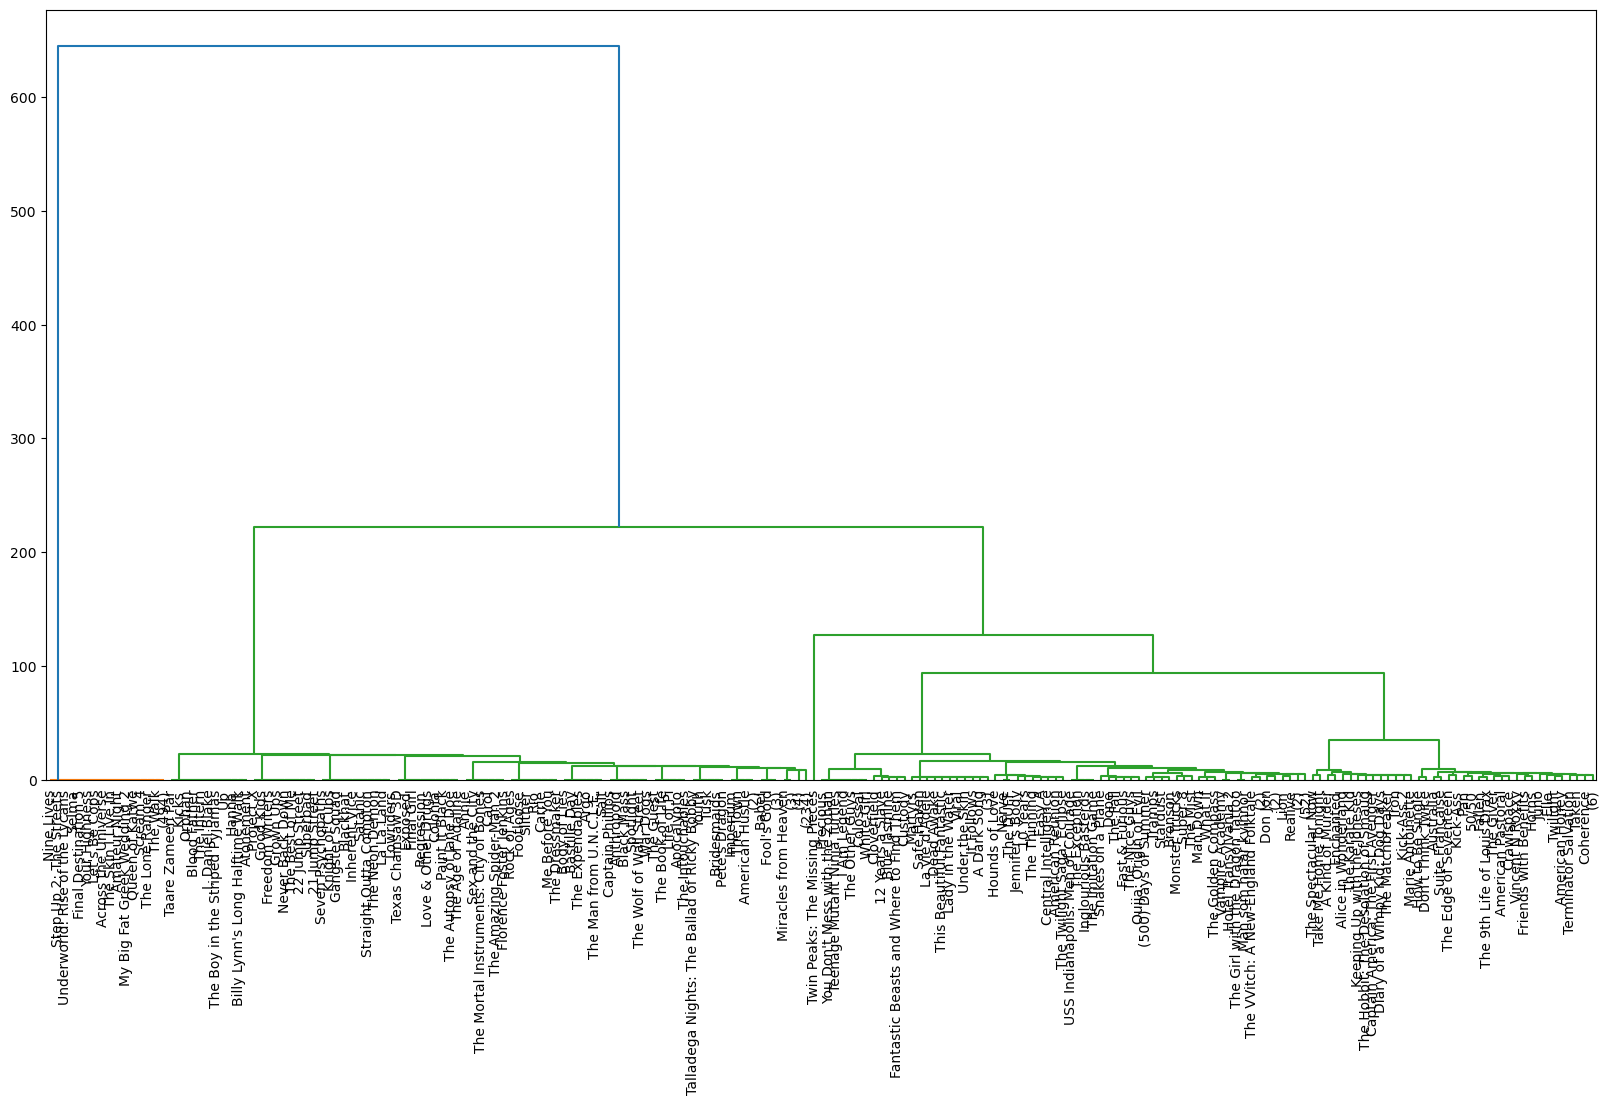

In [219]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix,labels=imdb.Title.values,leaf_rotation=90,
           leaf_font_size=10,p=15,truncate_mode="level")
plt.show()

In [220]:
max_d=30
clusters=fcluster(linkage_matrix,max_d,criterion="distance")

imdb['h_clust']=clusters

for x in sorted(imdb.h_clust.unique()):
    print(x)
    print(imdb[imdb.h_clust==x][['Title']].head(10))

1
                      Title
0   Guardians of the Galaxy
1                Prometheus
2                     Split
3                      Sing
5            The Great Wall
8        The Lost City of Z
9                Passengers
12                Rogue One
13                    Moana
15  The Secret Life of Pets
2
                         Title
4                Suicide Squad
6                   La La Land
16               Hacksaw Ridge
23                      Trolls
29            Assassin's Creed
33                    Deadpool
35  Captain America: Civil War
40               Sausage Party
41                   Moonlight
42     Don't Fuck in the Woods
3
                                         Title
7                                     Mindhorn
10     Fantastic Beasts and Where to Find Them
11                              Hidden Figures
14                                    Colossal
18                                        Lion
22                              Hounds of Love
27              

In [221]:
from sklearn.cluster import KMeans

In [222]:
inertia=[]
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X_DTM)
    inertia.append(kmeans.inertia_)

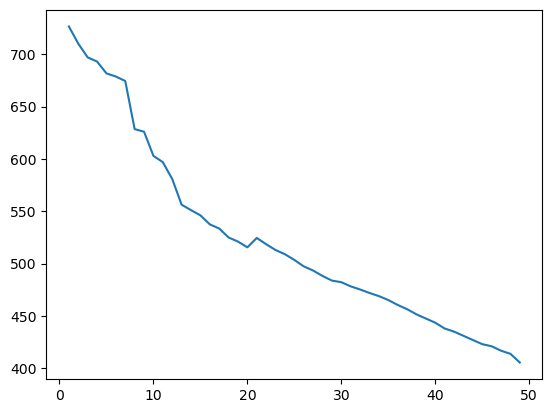

In [223]:
plt.plot(range(1,50),inertia)
plt.show()

In [224]:
kmeans_final=KMeans(n_clusters=10).fit(X_DTM)

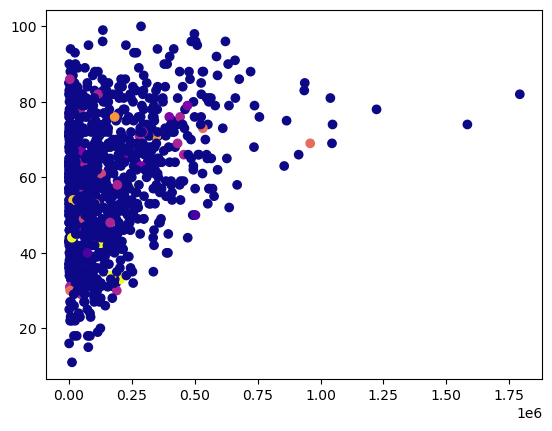

In [225]:
plt.scatter(imdb.Votes,imdb.Metascore,c=kmeans_final.labels_,cmap="plasma")

In [229]:
X_DTM=pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_)

In [231]:
X=pd.concat([X_DTM,imdb.Votes,imdb.Rating],axis=1)

In [237]:
inertia=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

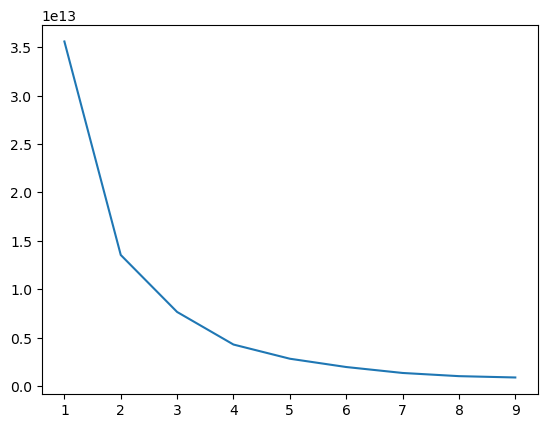

In [239]:
plt.plot(range(1,10),inertia)
plt.show()

In [241]:
kmeans_final=KMeans(n_clusters=4).fit(X)

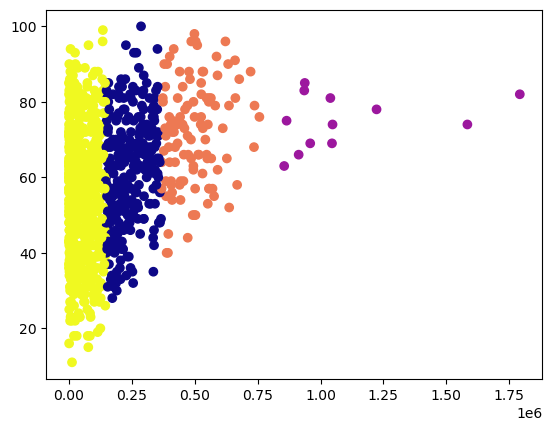

In [243]:
plt.scatter(imdb.Votes,imdb.Metascore,c=kmeans_final.labels_,cmap="plasma")

In [245]:
imdb['kmeans_clust']=kmeans_final.labels_

In [247]:
for x in range(4):
    print(x)
    print(imdb[imdb.kmeans_clust==x][['Title']].head(10))

0
                                      Title
2                                     Split
6                                La La Land
9                                Passengers
10  Fantastic Beasts and Where to Find Them
12                                Rogue One
16                            Hacksaw Ridge
17                             Jason Bourne
19                                  Arrival
32                        X-Men: Apocalypse
37                           Doctor Strange
1
                       Title
36              Interstellar
54           The Dark Knight
64              The Prestige
76              The Avengers
77      Inglourious Basterds
80                 Inception
82   The Wolf of Wall Street
87                    Avatar
99              The Departed
124    The Dark Knight Rises
2
                                          Title
0                       Guardians of the Galaxy
1                                    Prometheus
4                                 Suicide Squad